# "Classifiez automatiquement des biens de consommation"
_Merging best results obtained in NLP and PICT notebooks_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [1]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on Colab

In [2]:
if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Mounted at /gdrive
/gdrive
You're on Google Colab


Installations and importations required in the virtual environment.

In [3]:
!pip install wikipedia2vec==0.2.2
!pip install category-encoders
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
# !pip install tensorflow-hub
# !pip install tensorflow==2.1.0
!pip install Cluster_Ensembles

     |████████████████████████████████| 1.1MB 5.8MB/s 
     |████████████████████████████████| 276kB 38.0MB/s 
     |████████████████████████████████| 143kB 39.2MB/s 
  Created wheel for wikipedia2vec: filename=wikipedia2vec-0.2.2-cp36-cp36m-linux_x86_64.whl size=4423230 sha256=0c5d83f1bf2e2149e39d80ab268001b0d1bfcbda6846e0b28982c206161d253e
  Stored in directory: /root/.cache/pip/wheels/bf/bc/96/1ac030513bf05d0d47d5dc6d194a73595dbcd7d1ff79145130
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp36-cp36m-linux_x86_64.whl size=861179 sha256=5c023420e0b3e8f74b05c61f0555574aca6d669acfb8d506a514adc67e885321
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
  Created wheel for mwparserfromhell: filename=mwparserfromhell-0.5.4-cp36-cp36m-linux_x86_64.whl size=183774 sha256=cb86f4b538a5426f05ac7ccb26fbd9178b83b9d20e62ae43a12dfe2ae3adc93b
  Stored in directory: /root/.cache/pip/wheels/2a/76/d5/7088b941df3b362c45dd7912dd05314b

In [4]:
import os
if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS':
        os.chdir('/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS')
else:
    if not (os.path.exists(os.getcwd()+'/requirements_nlp.txt') \
                     and os.path.exists(os.getcwd()+'/P6_functions.py')):
        print("ERROR: Make sure 'P6_functions.py' and \
'requirements_nlp.txt' are in the current working directory")

!pip install -r requirements_nlp.txt

  Created wheel for gTTS-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4096 sha256=04d47b602387acfb1060f0b54ab8bbea616cb13cf26d9724e3cfa46ca5701ca2
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gTTS-token
ERROR: nbclient 0.5.1 has requirement jupyter-client>=6.1.5, but you'll have jupyter-client 5.3.5 which is incompatible.
  Found existing installation: nest-asyncio 1.4.3
    Uninstalling nest-asyncio-1.4.3:
      Successfully uninstalled nest-asyncio-1.4.3


In [5]:
from P6_functions import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Installations (creating the requirements file)

In [6]:
# !pip freeze > requirements_merging.txt

Importation of modules and packages. 

In [7]:
import io
import string
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Setting pandas display options.

In [8]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                  'display.max_colwidth': 100,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
  pd.set_option(k,v)

## COMPARAISON DES PREDICTIONS

#### Importing the datasets

In [9]:
### Loading best NLP results (best dataset prior to clustering)
import dill as pickle
with open('NLP_dict_best_df.pkl', 'rb') as file:
    NLP_dict_best_df = pickle.load(file)
### Loading best NLP results (best labels)
import dill as pickle
with open('NLP_df_res_clust.pkl', 'rb') as file:
    NLP_df_res_clust = pickle.load(file)

In [37]:
NLP_df_res_clust.keys()

Index(['categories', 'N01_gsc_preproc_km-ARI', 'N01_gsc_preproc_km-VMEAS',
       'N02_preproc_dimred_km-ARI', 'N02_preproc_dimred_km-VMEAS', 'N03_gsc_preproc_tm-ARI',
       'N03_gsc_preproc_tm-VMEAS', 'N04a_gsc_preproc_dimreduc_w2v_km-ARI',
       'N04a_gsc_preproc_dimreduc_w2v_km-VMEAS', 'N04b_USEpname_dimred_km-ARI',
       'N04b_USEpname_dimred_km-VMEAS'],
      dtype='object')

In [36]:
# #### RE EXPORTATION
# # ### Pickling the best preprocessed dataset prior to clustering
# import dill as pickle
# # best dataframe prior to clustering
# with open('NLP_dict_best_df.pkl', 'wb') as file:
#     pickle.dump(NLP_dict_best_df, file)
# # best labels
# with open('NLP_df_res_clust.pkl', 'wb') as file:
#     pickle.dump(df_res_clust, file)

In [10]:
### Loading best PICT results (best dataset prior to clustering)
import dill as pickle
with open('PICT_dict_best_df.pkl', 'rb') as file:
    PICT_dict_best_df = pickle.load(file)
### Loading best PICT results (best labels)
import dill as pickle
with open('PICT_df_res_clust.pkl', 'rb') as file:
    PICT_df_res_clust = pickle.load(file)

In [11]:
# harmonize the names of the clusters with the names of true categories

NLP_df_res_clust = categ_identificator(NLP_df_res_clust, true_cat=None)
PICT_df_res_clust = categ_identificator(PICT_df_res_clust, true_cat=None)

### A) Voting among predictions

#### NLP only

In [12]:
# best scores for each main NLP strategies 
ser_pairs_ARI = comp_clust_metrics_col_pairs(NLP_df_res_clust,
                                                first_vs_others=True,
                                                n_score='ari',
                                                print_opt=False)
ser_pairs_VMEAS = comp_clust_metrics_col_pairs(NLP_df_res_clust,
                                                first_vs_others=True,
                                                n_score='v_meas',
                                                print_opt=False)
display(ser_pairs_ARI, ser_pairs_VMEAS)

(categories, N01_gsc_preproc_km-ARI)                   0.40
(categories, N01_gsc_preproc_km-VMEAS)                 0.33
(categories, N02_preproc_dimred_km-ARI)                0.47
(categories, N02_preproc_dimred_km-VMEAS)              0.43
(categories, N03_gsc_preproc_tm-ARI)                   0.56
(categories, N03_gsc_preproc_tm-VMEAS)                 0.56
(categories, N04a_gsc_preproc_dimreduc_w2v_km-ARI)     0.56
(categories, N04a_gsc_preproc_dimreduc_w2v_km-VMEAS)   0.56
(categories, N04b_USEpname_dimred_km-ARI)              0.69
(categories, N04b_USEpname_dimred_km-VMEAS)            0.69
Name: ari_7.0_1st_vs_others, dtype: float64

(categories, N01_gsc_preproc_km-ARI)                   0.57
(categories, N01_gsc_preproc_km-VMEAS)                 0.60
(categories, N02_preproc_dimred_km-ARI)                0.53
(categories, N02_preproc_dimred_km-VMEAS)              0.60
(categories, N03_gsc_preproc_tm-ARI)                   0.59
(categories, N03_gsc_preproc_tm-VMEAS)                 0.59
(categories, N04a_gsc_preproc_dimreduc_w2v_km-ARI)     0.63
(categories, N04a_gsc_preproc_dimreduc_w2v_km-VMEAS)   0.63
(categories, N04b_USEpname_dimred_km-ARI)              0.73
(categories, N04b_USEpname_dimred_km-VMEAS)            0.73
Name: v_meas_7.0_1st_vs_others, dtype: float64

Let's try to get a better ari than best ARI = 0.69, and a better v_measure than best v-measure using voting between different cluster predicitions (2 to 6 predictions compared)

In [13]:
ari_list, v_meas_list = [], []
pairs_list = []

# Loop on the number of columns to include in the voting process
for k in [2,3,4,5,6]:

    print(f'k={k}', end='')
    pairs = combinlist(NLP_df_res_clust.iloc[:,1:].columns, k)

    # Loop on the pairs of columns (different clusters predictions)
    for i, cols in enumerate(pairs, 1):

        print('\r', f'k={k}: {i}/{len(pairs)}', end='')
        # Vote using the most frequent label (mode)
        ser_vote_clust = NLP_df_res_clust[list(cols)].apply(lambda x: x.mode()[0],
                                                            axis=1)
        # Compute ari and v_measure and store in a list
        ari = adjusted_rand_score(NLP_df_res_clust['categories'],
                                ser_vote_clust)
        v_meas = v_measure_score(NLP_df_res_clust['categories'],
                                ser_vote_clust)
        
        ari_list.append(ari)
        v_meas_list.append(v_meas)

    pairs_list.extend(pairs)

# put the results in a dataframe and show the best ari and v_measure obtained
df_voting = pd.DataFrame({'ari': ari_list,
                          'v_meas': v_meas_list},
                         index = pairs_list)
print('\n', df_voting.max())

 k=6: 210/210
 ari      0.69
v_meas   0.73
dtype: float64


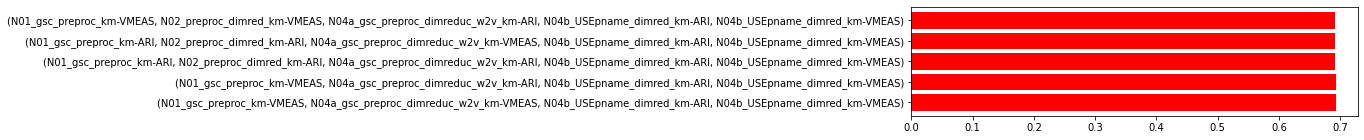

In [14]:
# plot best score for vote (between 2 to 6 pairs)
fig = plt.figure(figsize=(8,2))
df_voting['ari'].sort_values(ascending=False)[0:5].plot.barh(width=0.8,
                                                             color='red')

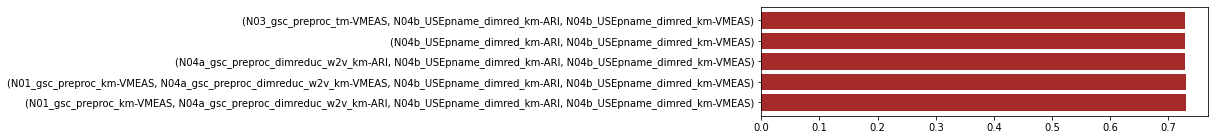

In [15]:
fig = plt.figure(figsize=(8,2))
df_voting['v_meas'].sort_values(ascending=False)[0:5].plot.barh(width=0.8,
                                                             color='brown')

#### PICT only

In [16]:
# best scores for each main NLP strategies 
ser_pairs_ARI = comp_clust_metrics_col_pairs(PICT_df_res_clust,
                                                first_vs_others=True,
                                                n_score='ari',
                                                print_opt=False)
ser_pairs_VMEAS = comp_clust_metrics_col_pairs(PICT_df_res_clust,
                                                first_vs_others=True,
                                                n_score='v_meas',
                                                print_opt=False)
display(ser_pairs_ARI, ser_pairs_VMEAS)

(category, P01_gsc_preproc_dimred_km-ARI)     0.09
(category, P01_gsc_preproc_dimred_km-VMEAS)   0.09
(category, P02_gsc_preproc_bovw_km-ARI)       0.07
(category, P02_gsc_preproc_bovw_km-VMEAS)     0.07
Name: ari_7.0_1st_vs_others, dtype: float64

(category, P01_gsc_preproc_dimred_km-ARI)     0.14
(category, P01_gsc_preproc_dimred_km-VMEAS)   0.14
(category, P02_gsc_preproc_bovw_km-ARI)       0.11
(category, P02_gsc_preproc_bovw_km-VMEAS)     0.11
Name: v_meas_7.0_1st_vs_others, dtype: float64

Let's try to get a better ari than best ARI = 0.14, and a better v_measure than best v-measure using voting between different cluster predicitions (2 to 6 predictions compared)

In [17]:
ari_list, v_meas_list = [], []
pairs_list = []

# Loop on the number of columns to include in the voting process
for k in [2,3,4]:

    print(f'k={k}', end='')
    pairs = combinlist(PICT_df_res_clust.iloc[:,1:].columns, k)

    # Loop on the pairs of columns (different clusters predictions)
    for i, cols in enumerate(pairs, 1):

        print('\r', f'k={k}: {i}/{len(pairs)}', end='')
        # Vote using the most frequent label (mode)
        ser_vote_clust = PICT_df_res_clust[list(cols)].apply(lambda x: x.mode()[0],
                                                            axis=1)
        # Compute ari and v_measure and store in a list
        ari = adjusted_rand_score(PICT_df_res_clust['category'],
                                ser_vote_clust)
        v_meas = v_measure_score(PICT_df_res_clust['category'],
                                ser_vote_clust)
        
        ari_list.append(ari)
        v_meas_list.append(v_meas)

    pairs_list.extend(pairs)

# put the results in a dataframe and show the best ari and v_measure obtained
df_voting = pd.DataFrame({'ari': ari_list,
                          'v_meas': v_meas_list},
                         index = pairs_list)
print('\n', df_voting.max())

 k=4: 1/1
 ari      0.09
v_meas   0.14
dtype: float64


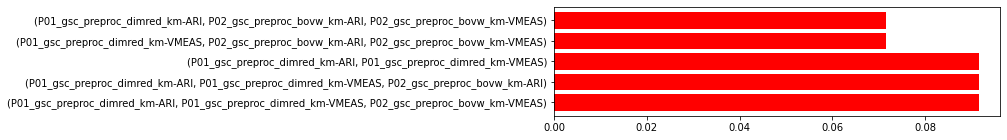

In [18]:
# plot best score for vote (between 2 to 6 pairs)
fig = plt.figure(figsize=(8,2))
df_voting['ari'].sort_values(ascending=False)[0:5].plot.barh(width=0.8,
                                                             color='red')

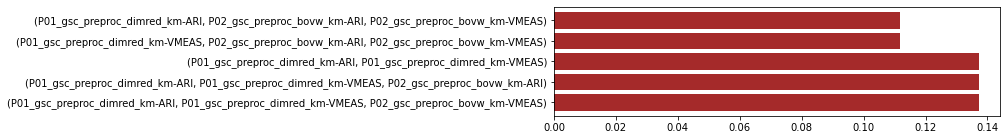

In [19]:
fig = plt.figure(figsize=(8,2))
df_voting['v_meas'].sort_values(ascending=False)[0:5].plot.barh(width=0.8,
                                                             color='brown')

#### Best NLP and best PICT predictions

In [20]:
df_res_clust = pd.concat([NLP_df_res_clust.reset_index(),
                          PICT_df_res_clust.reset_index()],
                         axis=1)[['uniq_id', 'categories',
                                  'N04b_USEpname_dimred_km-ARI',
                                 'N04b_USEpname_dimred_km-VMEAS',
                                 'P01_gsc_preproc_dimred_km-ARI',
                                 'P01_gsc_preproc_dimred_km-VMEAS']].set_index('uniq_id')

In [21]:
# best scores for each main NLP strategies 
ser_pairs_ARI = comp_clust_metrics_col_pairs(df_res_clust,
                                                first_vs_others=True,
                                                n_score='ari',
                                                print_opt=False)
ser_pairs_VMEAS = comp_clust_metrics_col_pairs(df_res_clust,
                                                first_vs_others=True,
                                                n_score='v_meas',
                                                print_opt=False)
display(ser_pairs_ARI, ser_pairs_VMEAS)

(categories, N04b_USEpname_dimred_km-ARI)       0.69
(categories, N04b_USEpname_dimred_km-VMEAS)     0.69
(categories, P01_gsc_preproc_dimred_km-ARI)     0.09
(categories, P01_gsc_preproc_dimred_km-VMEAS)   0.09
Name: ari_7.0_1st_vs_others, dtype: float64

(categories, N04b_USEpname_dimred_km-ARI)       0.73
(categories, N04b_USEpname_dimred_km-VMEAS)     0.73
(categories, P01_gsc_preproc_dimred_km-ARI)     0.14
(categories, P01_gsc_preproc_dimred_km-VMEAS)   0.14
Name: v_meas_7.0_1st_vs_others, dtype: float64

Let's try to get a better ari than best ARI = 0.69, and a better v_measure than best v-measure using voting between different cluster predicitions (2 to 6 predictions compared)

In [22]:
ari_list, v_meas_list = [], []
pairs_list = []

# Loop on the number of columns to include in the voting process
for k in [2,3,4,5,6]:

    print(f'k={k}', end='')
    pairs = combinlist(df_res_clust.iloc[:,1:].columns, k)

    # Loop on the pairs of columns (different clusters predictions)
    for i, cols in enumerate(pairs, 1):

        print('\r', f'k={k}: {i}/{len(pairs)}', end='')
        # Vote using the most frequent label (mode)
        ser_vote_clust = df_res_clust[list(cols)].apply(lambda x: x.mode()[0],
                                                            axis=1)
        # Compute ari and v_measure and store in a list
        ari = adjusted_rand_score(df_res_clust['categories'],
                                ser_vote_clust)
        v_meas = v_measure_score(df_res_clust['categories'],
                                ser_vote_clust)
        
        ari_list.append(ari)
        v_meas_list.append(v_meas)

    pairs_list.extend(pairs)

# put the results in a dataframe and show the best ari and v_measure obtained
df_voting = pd.DataFrame({'ari': ari_list,
                          'v_meas': v_meas_list},
                         index = pairs_list)
print('\n', df_voting.max())

 k=4: 1/1k=5k=6
 ari      0.69
v_meas   0.73
dtype: float64


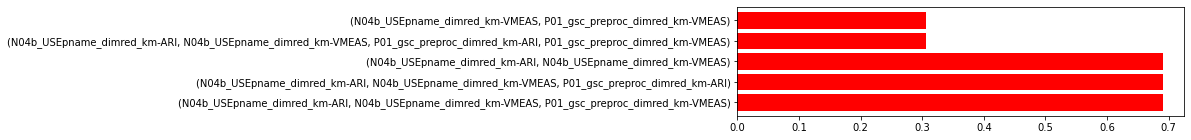

In [23]:
# plot best score for vote (between 2 to 6 pairs)
fig = plt.figure(figsize=(8,2))
df_voting['ari'].sort_values(ascending=False)[0:5].plot.barh(width=0.8,
                                                             color='red')

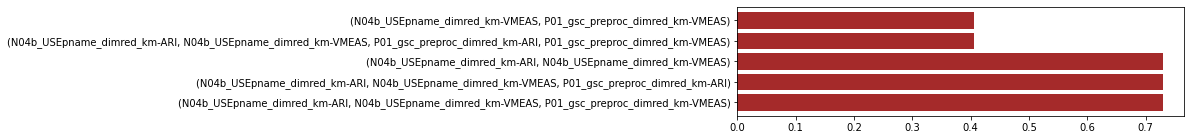

In [24]:
fig = plt.figure(figsize=(8,2))
df_voting['v_meas'].sort_values(ascending=False)[0:5].plot.barh(width=0.8,
                                                             color='brown')

### B) Mixing features

In [58]:
# merge the content of the two dictionaries (containing best features)

dict_best_df = {**NLP_dict_best_df, **PICT_dict_best_df}

In [61]:
list(dict_best_df.keys())
pair_cols = combinlist(list(dict_best_df.keys()), 2)

In [63]:
dict_best_df.keys()

dict_keys(['N01_gsc_preproc_km-ARI', 'N01_gsc_preproc_km-VMEAS', 'N02_preproc_dimred_km-ARI', 'N02_preproc_dimred_km-VMEAS', 'N03_gsc_preproc_tm-ARI', 'N03_gsc_preproc_tm-VMEAS', 'N04a_gsc_preproc_dimreduc_w2v_km-ARI', 'N04a_gsc_preproc_dimreduc_w2v_km-VMEAS', 'N04b_USEpname_dimred_km-ARI', 'N04b_USEpname_dimred_km-VMEAS', 'P01_gsc_preproc_dimred_km-ARI', 'P01_gsc_preproc_dimred_km-VMEAS', 'P02_gsc_preproc_bovw_km-ARI', 'P02_gsc_preproc_bovw_km-VMEAS'])

In [81]:
'''
Class to get from the big dataframe df_pict (containing all
the preprocessed images) one series of preprocessed images (column : n_col_img)
and unfold the data to get a dataframe with each pixel as a column
'''

class GetFeaturesFromDict(BaseEstimator, TransformerMixin):

    def __init__(self, n_col_img=None):
        self.n_col_img = n_col_img # one column of a list of columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None): # X is the big df_pict datafram
        X_trans = pd.DataFrame()
        # get the two selected pd.DataFrame from dictionary (X)
        for key in self.n_col_img:
            X_trans = pd.concat([X_trans, X[key]],
                                axis=1)
        return X_trans

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X, y)

In [87]:
dict_best_df.keys()

dict_keys(['N01_gsc_preproc_km-ARI', 'N01_gsc_preproc_km-VMEAS', 'N02_preproc_dimred_km-ARI', 'N02_preproc_dimred_km-VMEAS', 'N03_gsc_preproc_tm-ARI', 'N03_gsc_preproc_tm-VMEAS', 'N04a_gsc_preproc_dimreduc_w2v_km-ARI', 'N04a_gsc_preproc_dimreduc_w2v_km-VMEAS', 'N04b_USEpname_dimred_km-ARI', 'N04b_USEpname_dimred_km-VMEAS', 'P01_gsc_preproc_dimred_km-ARI', 'P01_gsc_preproc_dimred_km-VMEAS', 'P02_gsc_preproc_bovw_km-ARI', 'P02_gsc_preproc_bovw_km-VMEAS'])

In [136]:
# Define the pipeline to be executed and optimized by the GridSearch
pipe = Pipeline([('featgetter', GetFeaturesFromDict()), # Preprocessed Images getter
                 ('dimreduc', PCA(random_state=14)), # Dimension reductor
                 ('clusterer', KMeans(random_state=14))]) # KMeans clusterer

# Define the list of params to be tested in the GridSearchClust
param_grid = {'featgetter__n_col_img': [['N04b_USEpname_dimred_km-ARI', 'P01_gsc_preproc_dimred_km-ARI'],
                                        ['N04b_USEpname_dimred_km-VMEAS', 'P01_gsc_preproc_dimred_km-VMEAS']],
              'dimreduc': [UMAP(random_state=14),
                           PCA(random_state=14)],
              'dimreduc__n_components': [2,5,7,15,40,100,500], # [2,5,7,15,40,100,500],
              'clusterer': [KMeans(random_state=14)],
              'clusterer__n_clusters': [7]
              }

# Instanciate of the GridSearch object
gsc = GridSearchClust(estimator=pipe,
                      param_grid_estim=param_grid,
                      scoring=['silh', 'cal-har', 'dav_bould',
                               'ami', 'ari', 'homog', 'complet', 'v_meas'],
                      scoring_true_lab=df_res_clust['categories'],
                      refit='ari',
                      greater_is_better=True) # for the refit_score

In [133]:
# reshaping the np.array in the dictionary to have only dataframe
new_dict = {}
for k, v in dict_best_df.items():
    # print(k, v.shape)
    new_dict[k] = pd.DataFrame(v,
                                 index=df_res_clust.index)

In [137]:
##### Perform the grid search
gsc.fit(new_dict, verbose=True); # 

 28/28:

In [ ]:
# ### Pickling the results
# import dill as pickle
# with open('NP01_mixing_features.pkl', 'wb') as file:
#     pickle.dump(gsc, file)

In [ ]:
# ### Loading the results
# import dill as pickle
# with open('NP01_mixing_features.pkl', 'rb') as file:
#     gsc = pickle.load(file)

In [138]:
# Display results (products name) A REMPLACER

print("Best hyperparameters:", gsc.best_params_)
print("Best refit score:", gsc.best_score_)
# Best hyperparameters: {'clusterer': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
#        n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
#        random_state=14, tol=0.0001, verbose=0), 'clusterer__n_clusters': 7, 'dimreduc': UMAP(a=None, angular_rp_forest=False, b=None,
#      force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
#      local_connectivity=1.0, low_memory=False, metric='euclidean',
#      metric_kwds=None, min_dist=0.1, n_components=500, n_epochs=None,
#      n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
#      output_metric_kwds=None, random_state=14, repulsion_strength=1.0,
#      set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
#      target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
#      transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False), 'dimreduc__n_components': 100, 'featgetter__n_col_img': ['N04b_USEpname_dimred_km-ARI', 'P01_gsc_preproc_dimred_km-ARI']}
# Best refit score: 0.10926848955129281

Best hyperparameters: {'clusterer': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=14, tol=0.0001, verbose=0), 'clusterer__n_clusters': 7, 'dimreduc': UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=500, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=14, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False), 'dimreduc__n_components': 100, 'featgetter__n_col_img': ['N04b_USEpname_dimred_km-ARI', 'P01_gsc_preproc_dim

### Final evaluation

#### Matching scores (true categories vs. clusters)

In [ ]:
# Comparison of clusters labels with true categories

from sklearn.metrics import adjusted_rand_score, v_measure_score

ser_pairs_ARI = comp_clust_metrics_col_pairs(df_res_clust,
                                                first_vs_others=True,
                                                n_score='ari',
                                                print_opt=True)
ser_pairs_VMEAS = comp_clust_metrics_col_pairs(df_res_clust,
                                                first_vs_others=True,
                                                n_score='v_meas',
                                                print_opt=True)

NameError: ignored

In [ ]:
# Plotting the results

fig = plt.figure(figsize=(8,2))

ax1 = fig.add_subplot(121)
ser_pairs_ARI.plot.bar(width=0.8, color='red', ec='k', ax=ax1)
ax1.set_ylabel('ari')
# ax1.set(ylim=(0,1))

ax2 = fig.add_subplot(122)
ser_pairs_VMEAS.plot.bar(width=0.8, color='brown', ec='k', ax=ax2)
ax2.set_ylabel('v_measure')
# ax2.set(ylim=(0,1))

fig.suptitle('True categories vs. clusters',
             fontweight='bold')
fig.subplots_adjust(top=0.8, wspace=0.3)
plt.show()

#### Confusion matrix

In [ ]:
cat_clust_confmat = plot_conf_matrix_cat_vs_clust(df_res_clust['categories'],
                                                  df_res_clust['N04b_USEpname_dimred_km-ARI'],
                                                  normalize=False,
                                                  margins_sums=True,
                                                  margins_score=True)
with pd.option_context('display.float_format', '{:.0f}'.format):
    display(cat_clust_confmat)

In [ ]:
cm = plot_conf_matrix_cat_vs_clust(df_res_clust['categories'],
                            df_res_clust['N04b_USEpname_dimred_km-ARI'],
                            normalize=False,
                            margins_sums=False,
                            margins_score=False)
plot_heatmap(cm, "Confusion matrix | true categories vs. clusters",
             figsize=(8, 4), vmin=0, vmax=150, center=75,
                 palette=sns.color_palette("viridis", 20), shape='rect',
                 fmt='.0f', robust=False, fig=None, ax=None)

####  Sankey confusion diagram

In [ ]:
# to get interactive graph
plot_sankey_confusion_mat(cm, static=False, font_size=14, palette='tab10')

In [ ]:
# # to get interactive graph
# plot_sankey_confusion_mat(cm, static=False, font_size=14)

# to get static graph static
import plotly.graph_objects as go
from IPython.display import Image

img_bytes = plot_sankey_confusion_mat(cm, static=True, font_size=18,
                                      figsize=(2, 1.7), scale = 1)
Image(img_bytes)

#### 2D visualisation

In [ ]:
# Plotting a projection of the points (true categories vs. clusters) (PCA 0.71, UMAP 0.81, t-SNE 0.83)

# to plot only a sample of the points
ind_samp = df_res_clust.sample(300, random_state=14).index
data = pd.DataFrame(dict_best_df['N04b_USEpname_dimred_km-ARI'],
                    index=df_res_clust.index)

plot_projection_cat_clust(data.loc[ind_samp],
                          model=None,
                          ser_clust=df_res_clust['N04b_USEpname_dimred_km-ARI'].loc[ind_samp], # clustering already done
                 true_cat=df_res_clust['categories'].loc[ind_samp], # true categories
                 proj='PCA', tw_n_neigh=5, 
                 size=45, edgelinesize=2.5, legend_on=True,
                 title="True categories vs. Clusters (best BOW prior to Kmeans -> PCA)",
                 figsize=(8, 5), palette='tab10',
                 fig=None, ax=None, random_state=14, bboxtoanchor=(1,1))